In [45]:
from src import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data = readData('data/log2.csv')

In [4]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


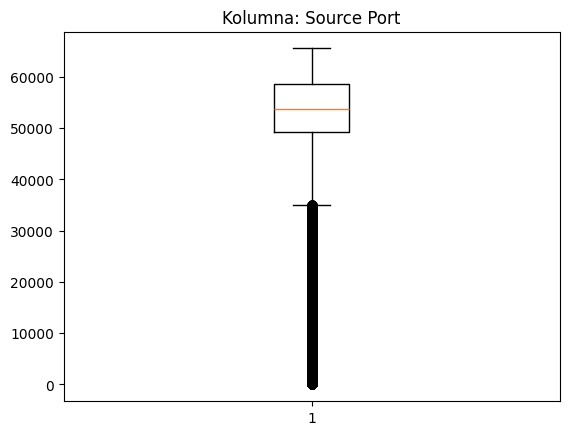

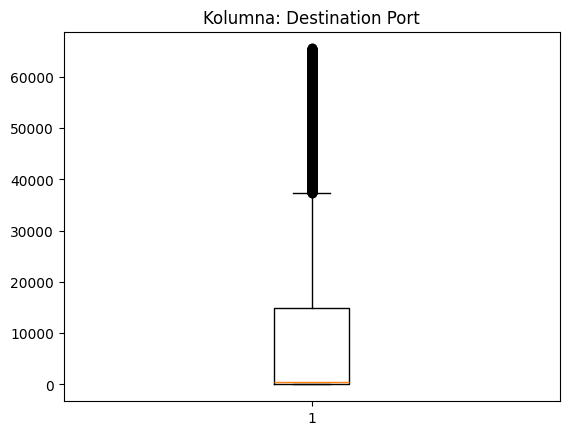

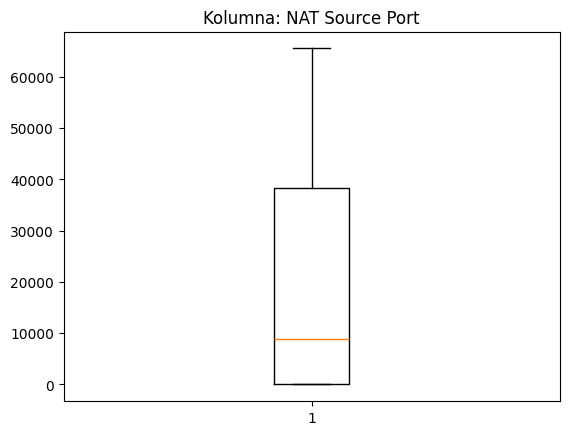

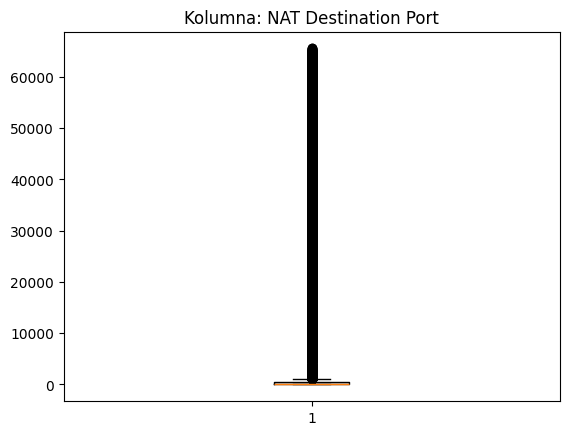

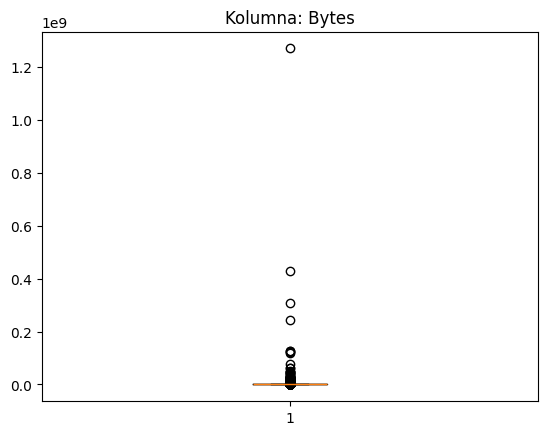

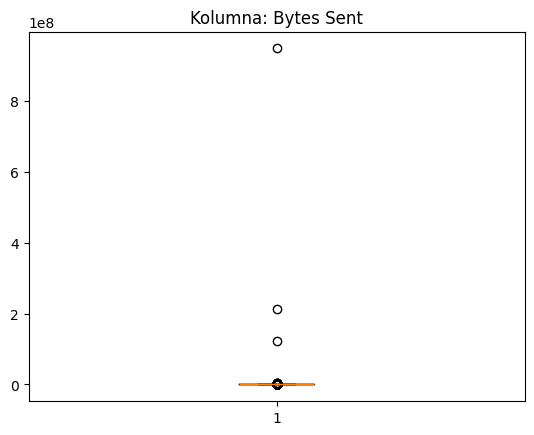

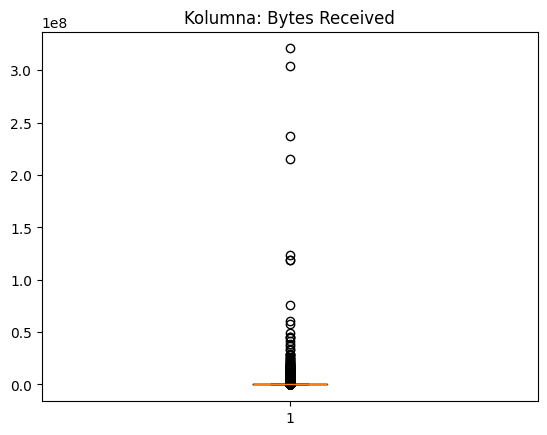

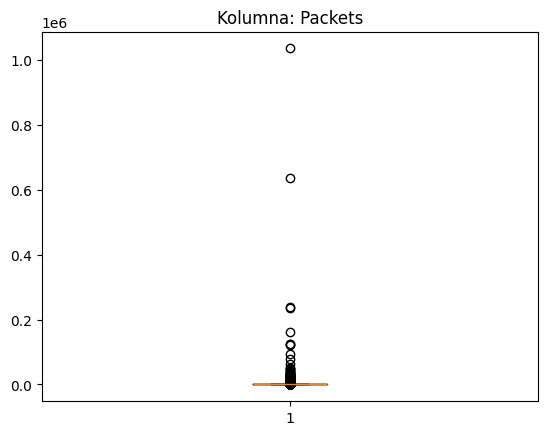

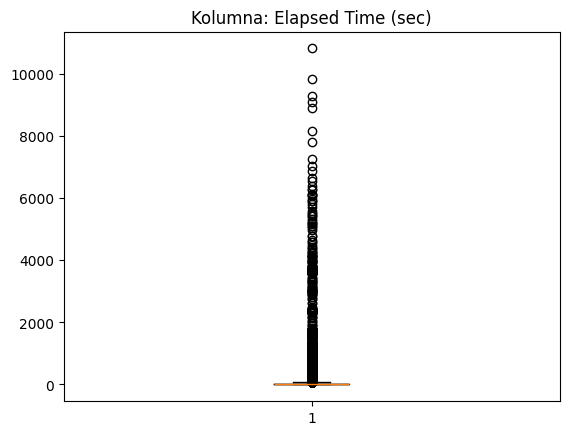

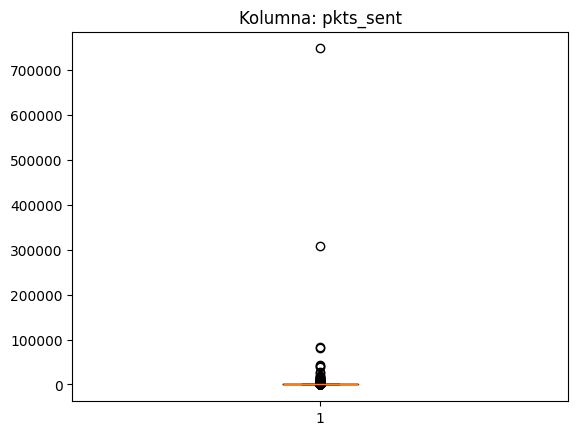

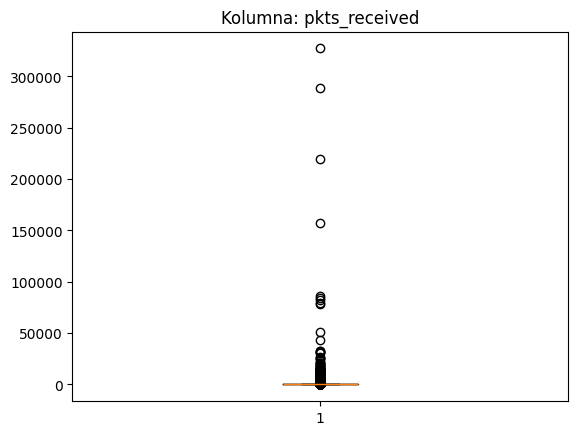

In [15]:
for i in data:
    if i in ['Action']:
        continue
    plt.boxplot(data[i])
    plt.title('Kolumna: {}'.format(i))
    plt.show()

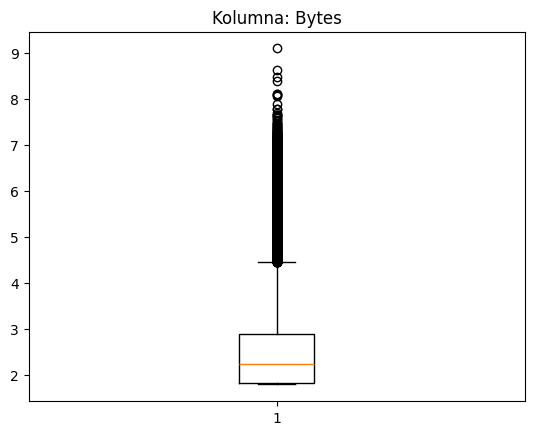

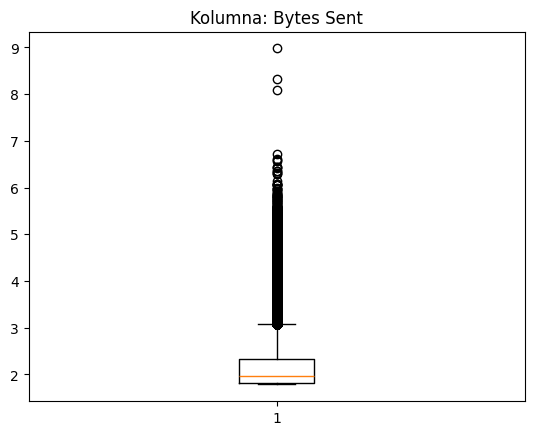

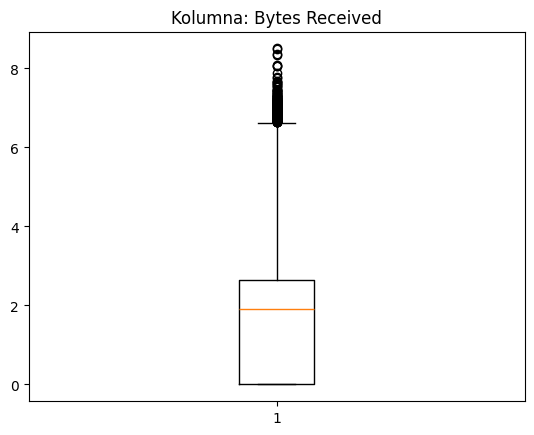

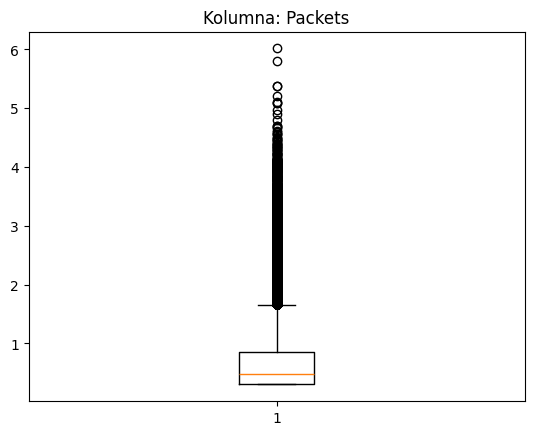

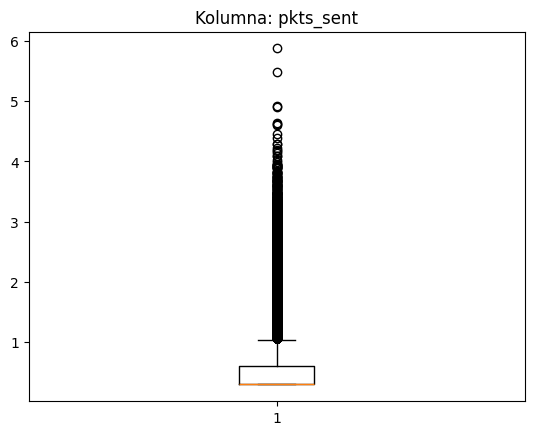

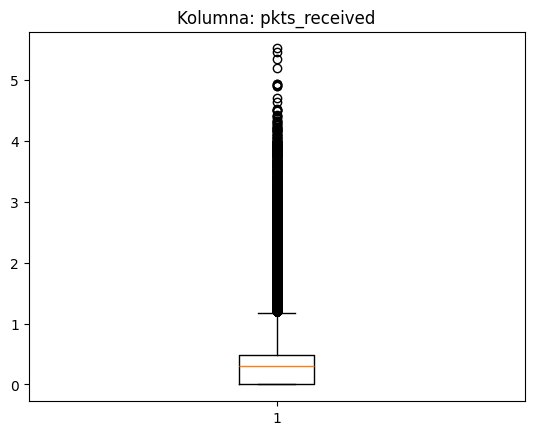

In [18]:
for i in ['Bytes','Bytes Sent','Bytes Received','Packets','pkts_sent','pkts_received']:
    plt.boxplot(np.log10(data[i] + 1))
    plt.title('Kolumna: {}'.format(i))
    plt.show()

In [34]:
data_log = data.copy()

In [35]:
columns_to_log = ['Bytes','Bytes Sent','Bytes Received','Packets','pkts_sent','pkts_received']
for i in columns_to_log:
    data_log[i] = np.log10(data_log[i] + 1)

In [36]:
x = data_log.drop('Action', axis=1)

In [44]:
pca = PCA(n_components=3)
pca.fit(x, data_log['Action'])
X_pca = pca.transform(x)

In [47]:
tsne = TSNE()
tsne.fit(X_pca, data_log['Action'])

TSNE()

['allow' 'drop' 'deny' 'reset-both']


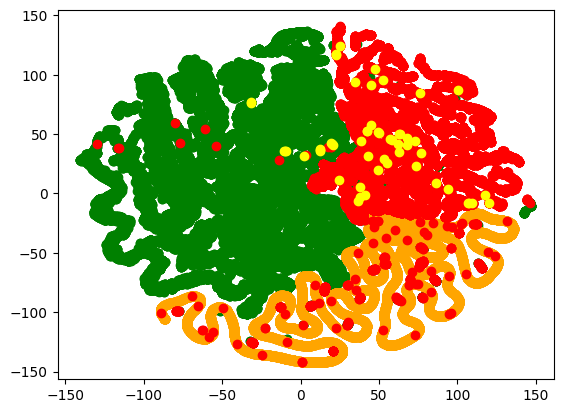

In [48]:
classes = data_log['Action'].unique()
color_map = {'allow': 'green', 'drop': 'orange', 'deny': 'red', 'reset-both': 'yellow'}
print(classes)

for className in classes:
    embedding = tsne.embedding_[data_log['Action'] == className]
    plt.scatter(embedding[:,0], embedding[:,1], c=color_map[className])
plt.show()

In [55]:
# with discretization
data_log_disc = data_log.copy()

In [56]:
reset_ports = readListFromFile('./data/reset_ports_list.txt')
allow_dest_ports = readListFromFile('./data/allow_dest_ports_list.txt')
deny_dest_ports = readListFromFile('./data/deny_dest_ports_list.txt')

In [57]:
data_log_disc['is_reset'] = data_log_disc['Source Port'].isin(reset_ports)
data_log_disc['is_allow'] = data_log_disc['Destination Port'].isin(allow_dest_ports)
data_log_disc['is_deny'] = data_log_disc['Destination Port'].isin(deny_dest_ports)

In [60]:
x_disc = data_log_disc.drop('Action', axis=1)
pca_disc = PCA(n_components=4)
pca.fit(x, data_log_disc['Action'])
x_pca_disc = pca.transform(x)

In [61]:
tsne_disc = TSNE()
tsne_disc.fit(x_pca_disc, data_log_disc['Action'])

TSNE()

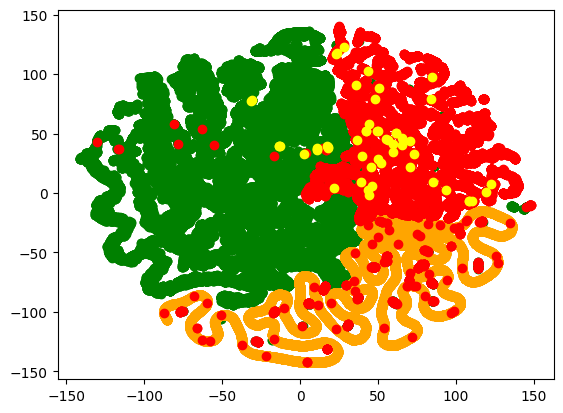

In [62]:
for className in classes:
    embedding = tsne_disc.embedding_[data_log_disc['Action'] == className]
    plt.scatter(embedding[:,0], embedding[:,1], c=color_map[className])
plt.show()

In [64]:
tsne_disc_wpca = TSNE()
tsne_disc_wpca.fit(x_disc, data_log_disc['Action'])

TSNE()

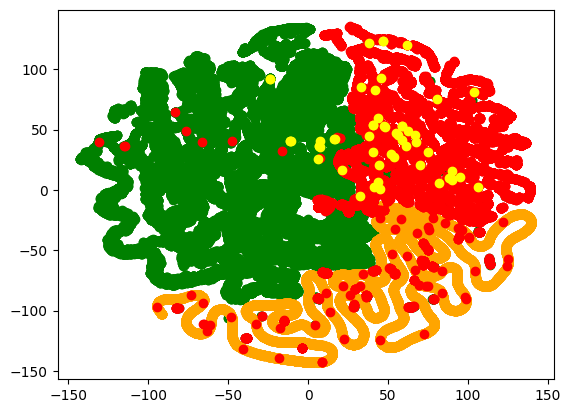

In [65]:
for className in classes:
    embedding = tsne_disc_wpca.embedding_[data_log_disc['Action'] == className]
    plt.scatter(embedding[:,0], embedding[:,1], c=color_map[className])
plt.show()